In [1]:
from pylab import *
%matplotlib inline

# Ecuacion diferencial a resolver 
$$
\ddot{x} + 0.5\dot{x} + sin(x) = exp(-t)sin(3t)
$$
con las condiciones iniciales:
$$
x(0)=0 \\ \\  \dot{x}(0)=1 
$$

Para obtener dos ecuaciones diferenciales de orden 1, se hará el siguiente cambio de variable: 

$$
y(t)=x(t)\\ \\dy(t)=\dot{x}(t) 
$$
Definimos las funciones: 
$$
f_1(t,y(t),dy(t)) = dy(t)\\ \\f_2(t,y(t),dy(t)) = exp(-t)sin(3t) - 0.5dy(t) - sin(y(t))
$$

In [2]:
def f1(dy,y,t): # definimos la primer función de primer orden 
    return dy
def f2(dy,y,t): # definimos la segunda función de primer orden 
    return exp(-t)*sin(3*t) - .5*dy - sin(y)


# Metodo de Euler
$$
y_{n+1} = y_n + hf_i(t_n,y_n,dy_n) 
$$

La expanción en series de Taylor de primer orden se obtiene evaluando:
$$
y(x_{n+1}) = y(x_n) + \sum_{m=1}^p \frac{f^{(m-1)}(x_n.y(x_n)) \, h^m}{m!}
$$

para p = 1, tenemos:

$$
y(x_{n+1}) = y(x_n) + hf(x_n,y(x_n))
$$

Los términos de orden superior se desprecian, El algoritmo de Euler utiliza esta expanción en series de Taylor lineal para calcular una nueva aproximación $ y(x_{n+1}) $ (que denotaremos $ y_{n+1} $) mediante la formula:

$$
y_{n+1} = y_n + hf(t_n,y_n) 
$$

In [3]:
def euler(funcion1,funcion2,p_ini,t_final,h): # definimos las variables para el metodo de euler
    tiempos = arange(0,t_final+h,h) # definimos el interbalo de tiempos de 0 a t_final, en pasos de tamaño h 
    y = [0]*len(tiempos) #zeros(len(tiempos)), damos el valor de cero a la lista y que tiene longitud igual al numero de tiempos 
    dy = [0]*len(tiempos) # damos el valor de cero a la lista dy que tiene longitud igual al numero de tiempos
    y[0] = p_ini[0] # le damos a y[0] como un valor inicial 
    dy[0] = p_ini[1] # le damos a dy[0] como un valor inicial
    for i in range(len(tiempos)-1): # se inicia un ciclo de i pasos desde 0 hasta el numero de tiempos-1
        y[i+1] = y[i] + funcion1(dy[i],y[i],tiempos[i])*h #se aplica el metodo de euler para la primer ecuacion diferencial
        dy[i+1]=dy[i] + funcion2(dy[i],y[i],tiempos[i])*h #se aplica el metodo de euler para la segunda ecuacion diferencial
    solucion = [tiempos,y,dy] # se define una lista que contiene las soluciones 
    return solucion # regresa las soluciones 

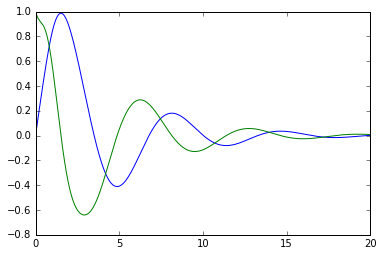

In [4]:
sol = euler(f1,f2,[0,1],20.,.001) # sol es igual a al metodo de euler aplicado a las funciones f1 y f2 previemente definidas, evaluadas en un punto inicial [y=0,dy=1] , para un tiempo final de 20 y con paso h = .001 
plot(sol[0],sol[1],sol[0],sol[2]) # se grafican las soluciones para y(t) y dy(t)
show()

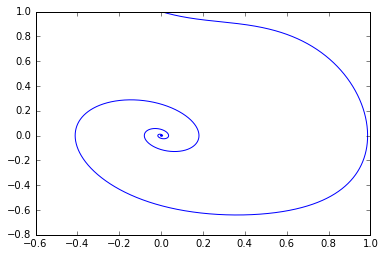

In [5]:
sol = euler(f1,f2,[0,1],100.,.001) # sol es igual a al metodo de euler aplicado a las funciones f1 y f2 previemente definidas, evaluadas en un punto inicial, para un tiempo final de 100 y con paso h = .001 
plot(sol[1],sol[2]) # se grafica de dy en funcion de y 

# Metodo de Taylor de segundo orden
$$
y_{n+1} = y_n + hf_i(t_n,y_n,dy_n) + \frac{h^2}{2} \left(
\frac{\partial f }{\partial t} + \frac{\partial 
f}{\partial y} f \right)
$$

La expanción en series de Taylor de segundo orden se obtiene evaluando:
$$
y(x_{n+1}) = y(x_n) + \sum_{m=1}^p \frac{f^{(m-1)}(x_n.y(x_n)) \, h^m}{m!}
$$

para p = 2, tenemos:

$$
y(x_{n+1}) = y(x_n) + hf(x_n,y(x_n)) + \frac{h^2}{2} f´(x_n,y(x_n))
$$

Sustituyendo

$$
f´(x_n,y(x_n)) = \frac{d}{dt}f(x,y(x))\Big|_{x_n}= \frac{∂}{∂t}f(t_n, y(t_n)) + \frac{d}{dt}y(t_n)\frac{∂}{∂y}f(t_n,y(t_n)),=\frac{∂}{∂t}f(t_n,y(t_n)) + f(t_n,y(t_n))\frac{∂}{∂y}f(t_n,y(t_n))
$$

denotando $ y(x_{n+1}) $ mediente $ y_{n+1} $ y tendremos la formula:

$$
y_{n+1} = y_n + hf(t_n,y_n) + \frac{h^2}{2} \frac{∂}{∂t}f(t_n,y(t_n)) +\frac{h^2}{2} f(t_n,y(t_n))\frac{∂}{∂y}f(t_n,y(t_n))
$$
$$
y_{n+1} = y_n + hf_i(t_n,y_n) + \frac{h^2}{2} \left(
\frac{\partial f }{\partial t} + \frac{\partial 
f}{\partial y} f \right)
$$

In [6]:
def d_f1(dy,y,t): # definimos el jacobiano de la primer función 
    return 0,1
def d_f2(dy,y,t): # definimos el jacobiano de la segunda función
    return exp(-t)*(3*cos(3*t)-sin(3*t)),-cos(y)

In [7]:
def segundo_orden1(ec_dif1,ec_dif2,p_ini,t_final,ec_jac1,ec_jac2,h): # definimos las variables para la serie de taylor de segundo orden
    tiempo=arange(0,t_final+h,h) # definimos el interbalo de tiempos de 0 a t_final, en pasos de tamaño h 
    y = zeros(len(tiempo)) # damos el valor de cero a la lista y que tiene longitud igual al numero de tiempos 
    dy = zeros(len(tiempo)) # damos el valor de cero a la lista dy que tiene longitud igual al numero de tiempos
    y[0] = p_ini[0] # le damos a y[0] como un valor inicial 
    dy[0] = p_ini[1] # le damos a dy[0] como un valor inicial
    for i in range(len(tiempo)-1): # se inicia un ciclo de i pasos desde 0 hasta el numero de tiempos-1
        y[i+1] = y[i] + h*ec_dif1(dy[i],y[i],tiempo[i]) # se aplica el metodo de segundo orden para la primer ecuacion diferencial
        y[i+1] += 0.5*h*h*ec_jac1(dy[i],y[i],tiempo[i])[0]
        y[i+1] += 0.5*h*h*ec_jac1(dy[i],y[i],tiempo[i])[1]*ec_dif1(dy[i],y[i],tiempo[i])
        dy[i+1] = dy[i] + h*ec_dif2(dy[i],y[i],tiempo[i])  # se aplica el metodo de segundo orden para la segunda ecuacion diferencial
        dy[i+1] += 0.5*h*h*ec_jac2(dy[i],y[i],tiempo[i])[0]
        dy[i+1] += 0.5*h*h*ec_jac2(dy[i],y[i],tiempo[i])[1]*ec_dif2(dy[i],y[i],tiempo[i])
    return tiempo,y,dy # regresa las soluciones 

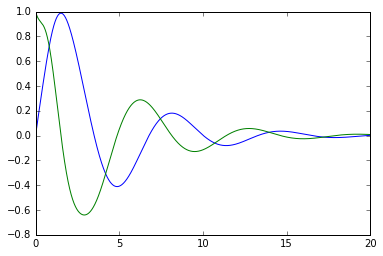

In [8]:
y_seg = segundo_orden1(f1,f2,[0,1],20.,d_f1,d_f2,h=0.001) # y_seg es igual a al metodo de Taylor de segundo orden aplicado a las funciones f1,f2,d_f1 y d_f2 previemente definidas, evaluadas en un punto inicial [y=0,dy=1] , para un tiempo final de 20 y con paso h = .001 
plot(y_seg[0],y_seg[1],y_seg[0],y_seg[2]) # se grafican las soluciones para y(t) y dy(t)

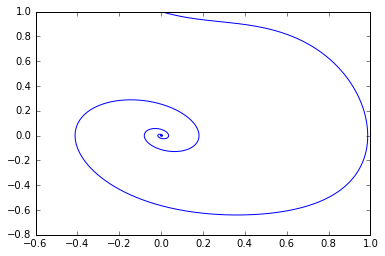

In [9]:
y_seg = segundo_orden1(f1,f2,[0,1],100.,d_f1,d_f2,h=0.001) # y_seg es igual a al metodo de Taylor de segundo orden a las funciones f1 y f2 previemente definidas, evaluadas en un punto inicial, para un tiempo final de 100 y con paso h = .001 
plot(y_seg[1],y_seg[2]) # se grafica de dy en funcion de y 

# Metodo Runge Kutta segundo orden
$$
y_{n+1} = y_n + hk_2 \\ \\
k_1 = f_i(t_n,y_n,dy_n) \\ \\
k_2 = f_i(t_n+\frac{h}{2},y_n+\frac{h}{2}k_1,dy_n+\frac{h}{2}k_1)\\ \\
$$

Los métodos de Runge-Kutta (RK) logran una exactitud del procedimiento de una serie de Taylor, sin requerir el cálculo de derivadas superiores. Probablemente uno de los procedimientos más difundidos, y a la vez más exactos, para obtener la solución numérica del problema de valor inicial:
$y´ = f(t,y)$ , con $y(t_0) = y_0$, 

Los métodos de Runge Kutta de cualquier orden se deducen mediante el desarrollo
de la serie de Taylor de la función f(t,y). Existen muchas variaciones, las cuales
tienen la forma:
$$
y_{i+1} = y_i + h(a_1k_1+ a_2k_2+...+ a_nk_n) 
$$

donde las $ a_i $son constantes y las k son:
$$
k_1 = f(t_i, y_i)\\ 
k_2 = f(t_i + p_1h, yi + q_{11}k_1h)\\
k_3 = f(t_i + p_2h, yi + q_{21}k_1h + q_{22}k_2h)\\
.\\
.\\
.\\
k_n = f(t_i + p_{n-1}h, y_i + q_{n-1,1}k_1h + q_{n-1,2}k_2h+…+ q_{n-1,n-1}k_{n-1}h)
$$

Generalmente las fórmulas de Runge-Kutta de segundo orden adoptan la forma:

$$
y(t+h) = y(t) +w_1hf(t,y) +w_2h f(t+\alpha h, y + \beta h f(t, y)) +O(h^3)\\
$$
donde $ w_1, w_2, \alpha, \beta $ son parámetros a nuestra disposición. 

El sistema de ecuaciones poseen soluciones, como por
ejemplo:   $ w_1 =0, w_2 = 1; \alpha = \beta = \frac{1}{2}$.

$$
y_{n+1} = y_n + hk_2 \\ \\
$$
Con:
$$
k_1 = f_i(t_n,y_n) \\ \\
k_2 = f_i(t_n+\frac{h}{2},y_n+\frac{h}{2}k_1)\\ \\
$$

En alguno libros, este método, se conoce como el método del punto medio

In [10]:
def rk2(ec_1,ec_2,p_ini,t_final,h):# definimos las variables para el metodo de Runge Kutta de segundo orden
    tiempo=arange(0,t_final+h,h) # definimos el interbalo de tiempos de 0 a t_final, en pasos de tamaño h
    y = zeros(len(tiempo)) # damos el valor de cero a la lista y que tiene longitud igual al numero de tiempos
    dy = zeros(len(tiempo)) # damos el valor de cero a la lista dy que tiene longitud igual al numero de tiempos
    y[0] = p_ini[0] # le damos a y[0] como un valor inicial
    dy[0] = p_ini[1] # le damos a dy[0] como un valor inicial
    for i in xrange(len(tiempo)-1): # se inicia un ciclo de i pasos desde 0 hasta el numero de tiempos-1
        k1 = ec_1(dy[i],y[i],tiempo[i]) # se aplica el metodo de Runge Kutta de segundo orden para la primer ecuacion diferencial
        k2 = h*ec_1(dy[i]+k1*h*.5,y[i]+k1*h*.5,tiempo[i]+h*.5)
        y[i+1] = y[i] + k2
        dk1 = ec_2(dy[i],y[i],tiempo[i]) # se aplica el metodo de Runge Kutta de segundo orden para la segunda ecuacion diferencial
        dk2 = h*ec_2(dy[i]+dk1*h*.5,y[i]+dk1*h*.5,tiempo[i]+h*.5)
        dy[i+1] = dy[i] + dk2
    return tiempo,y,dy # regresa las soluciones 

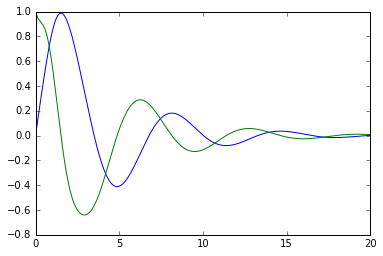

In [11]:
sol = rk2(f1,f2,[0,1],20.,.001) # sol es igual a al metodo de Rune Kutta de segundo orden aplicado a las funciones f1 y f2 previemente definidas, evaluadas en un punto inicial [y=0,dy=1] , para un tiempo final de 20 y con paso h = .001 
plot(sol[0],sol[1],sol[0],sol[2]) # se grafican las soluciones para y(t) y dy(t)
show()

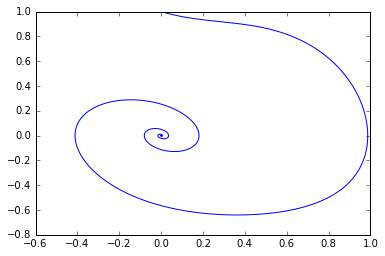

In [12]:
y_seg = rk2(f1,f2,[0,1],100.,h=0.001) # sol es igual a al metodo de Runge Kutta de segundo orden a las funciones f1 y f2 previemente definidas, evaluadas en un punto inicial, para un tiempo final de 100 y con paso h = .001 
plot(y_seg[1],y_seg[2]) # se grafica de dy en funcion de y 
show()

# Metodo Runge Kutta cuarto orden
$$
y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4) \\ \\
k_1 = f_i(t_n,y_n,dy_n) \\ \\
k_2 = f_i(t_n+\frac{h}{2},y_n+h\frac{k_1}{2},dy_n+h\frac{k_1}{2})\\ \\
k_3 = f_i(t_n+\frac{h}{2},y_n+h\frac{k_2}{2},dy_n+h\frac{k_2}{2})\\ \\
k_4 = f_i(t_n+h,y_n+hk_3,dy_n+hk_3)\\ \\
$$

Probablemente uno de los procedimientos más difundidos, y a la vez, más exacto
para obtener soluciones aproximadas del problema: $y´ = f(t,y)$, con $y(t_0) = y_0$,
sea el método de Runge Kutta de cuarto orden
Así, como en el método de R.K. de segundo orden hay un número infinito de
versiones, en el método de RK de cuarto orden existen infinitas versiones.
Una de las versiones es:

$$
y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4) \\ \\
$$
Con:
$$
k_1 = f_i(t_n,y_n) \\ \\
k_2 = f_i(t_n+\frac{h}{2},y_n+h\frac{k_1}{2})\\ \\
k_3 = f_i(t_n+\frac{h}{2},y_n+h\frac{k_2}{2})\\ \\
k_4 = f_i(t_n+h,y_n+hk_3)\\ \\
$$


In [13]:
def rk4(ec_1,ec_2,p_ini,t_final,h):# definimos las variables para el metodo de Runge Kutta de cuarto orden
    tiempo=arange(0,t_final+h,h) # definimos el interbalo de tiempos de 0 a t_final, en pasos de tamaño h
    y = zeros(len(tiempo)) # damos el valor de cero a la lista y que tiene longitud igual al numero de tiempos
    dy = zeros(len(tiempo))  # damos el valor de cero a la lista dy que tiene longitud igual al numero de tiempos
    y[0] = p_ini[0] # le damos a y[0] como un valor inicial
    dy[0] = p_ini[1] # le damos a dy[0] como un valor inicial
    for i in xrange(len(tiempo)-1): # se inicia un ciclo de i pasos desde 0 hasta el numero de tiempos-1
        k1 = ec_1(dy[i],y[i],tiempo[i])  # se aplica el metodo de Runge Kutta de cuarto orden para la primer ecuacion diferencial
        k2 = ec_1(dy[i]+k1*h*.5,y[i]+k1*h*.5,tiempo[i]+h*.5)
        k3 = ec_1(dy[i]+k2*h*.5,y[i]+k2*h*.5,tiempo[i]+h*.5)
        k4 = ec_1(dy[i]+k3*h,y[i]+k3*h,tiempo[i]+h)
        y[i+1] = y[i] + h*(k1+2*k2+2*k3+k4)/6
        dk1 = ec_2(dy[i],y[i],tiempo[i]) # se aplica el metodo de Runge Kutta de cuato orden para la segunda ecuacion diferencial
        dk2 = ec_2(dy[i]+dk1*h*.5,y[i]+dk1*h*.5,tiempo[i]+h*.5)
        dk3 = ec_2(dy[i]+dk2*h*.5,y[i]+dk2*h*.5,tiempo[i]+h*.5)
        dk4 = ec_2(dy[i]+dk3*h,y[i]+k3*h,tiempo[i]+h)
        dy[i+1] = dy[i] + h*(dk1+2*dk2+2*dk3+dk4)/6
    return tiempo,y,dy # regresa las soluciones 

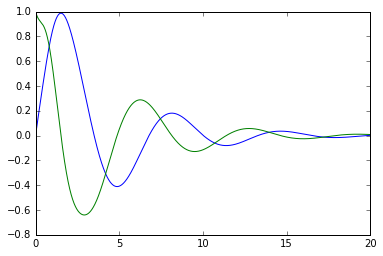

In [14]:
sol = rk4(f1,f2,[0,1],20.,.001) # sol es igual a al metodo de Rune Kutta de cuarto orden aplicado a las funciones f1 y f2 previemente definidas, evaluadas en un punto inicial [y=0,dy=1] , para un tiempo final de 20 y con paso h = .001 
plot(sol[0],sol[1],sol[0],sol[2]) # se grafican las soluciones para y(t) y dy(t) 
show()

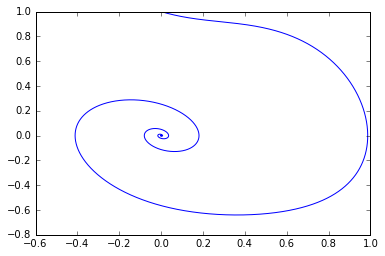

In [15]:
y_seg = rk4(f1,f2,[0,1],100.,h=0.001) # sol es igual a al metodo de Runge Kutta de cuarto orden a las funciones f1 y f2 previemente definidas, evaluadas en un punto inicial, para un tiempo final de 100 y con paso h = .001
plot(y_seg[1],y_seg[2]) # se grafica de dy en funcion de y 
show()